In [33]:
import pandas as pd
import os
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import calendar

In [34]:
#load and preprocess the data
df = pd.read_csv("../Datathon/insurance.csv")
df.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_99499/614486355.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg = df.groupby('region')['charges'].agg(['mean', 'count', 'std'])


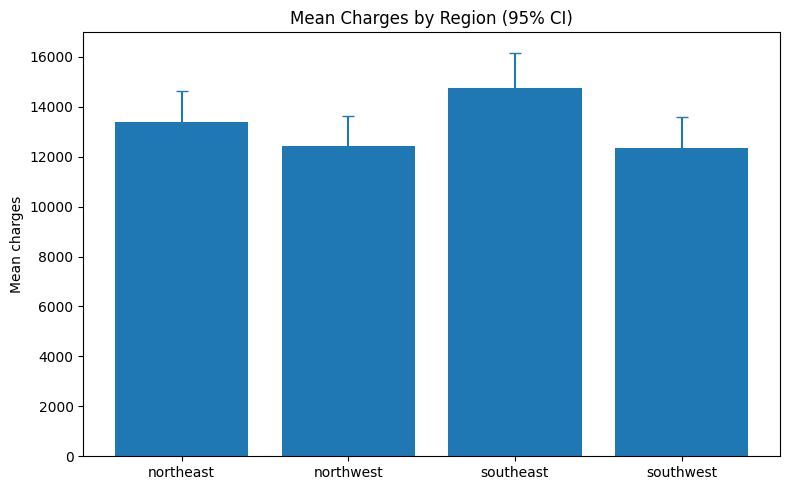

In [35]:
df['region'] = df['region'].astype('category')
df['log_charges'] = np.log1p(df['charges'])

agg = df.groupby('region')['charges'].agg(['mean', 'count', 'std'])
agg['sem'] = agg['std'] / np.sqrt(agg['count'])
agg['ci95'] = 1.96 * agg['sem']        # ~95% CI

regions = agg.index.astype(str).tolist()
y = agg['mean'].to_numpy()
yerr = agg['ci95'].to_numpy()

x = np.arange(len(regions))

plt.figure(figsize=(8,5))
plt.bar(x, y)
plt.errorbar(x, y, yerr=yerr, fmt='none', capsize=4)
plt.xticks(x, regions)
plt.ylabel("Mean charges")
plt.title("Mean Charges by Region (95% CI)")
plt.tight_layout()
plt.show()


/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_99499/3666973773.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agg_log = df.groupby('region')['log_charges'].agg(['mean', 'count', 'std'])


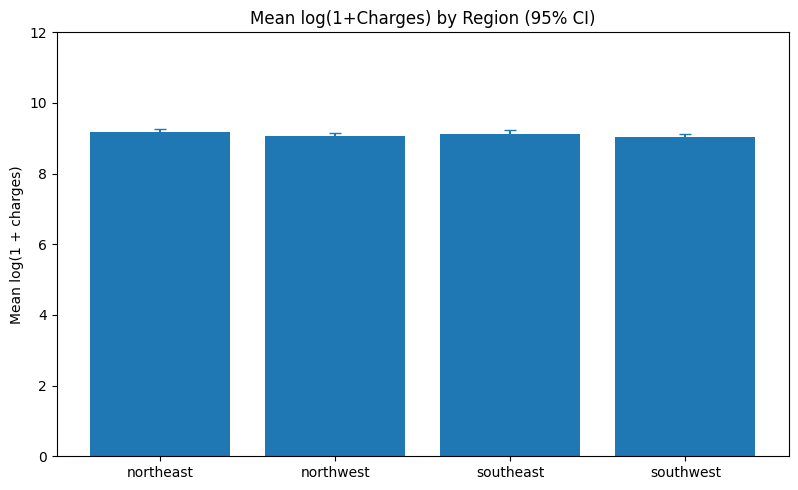

In [36]:
agg_log = df.groupby('region')['log_charges'].agg(['mean', 'count', 'std'])
agg_log['sem']  = agg_log['std'] / np.sqrt(agg_log['count'])
agg_log['ci95'] = 1.96 * agg_log['sem']

regions = agg_log.index.astype(str).tolist()
y = agg_log['mean'].to_numpy()
yerr = agg_log['ci95'].to_numpy()

x = np.arange(len(regions))

plt.figure(figsize=(8,5))
plt.bar(x, y)
plt.errorbar(x, y, yerr=yerr, fmt='none', capsize=4)
plt.xticks(x, regions)
plt.ylabel("Mean log(1 + charges)")
plt.title("Mean log(1+Charges) by Region (95% CI)")
plt.tight_layout()
plt.ylim(0, 12)     # charges in dollars
plt.show()

/var/folders/nh/r108gvkd3sz7mwcnj2bcx7vr0000gn/T/ipykernel_99499/2302219080.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([female, male], labels=['Female', 'Male'], showfliers=True)  # set showfliers=False to hide outliers


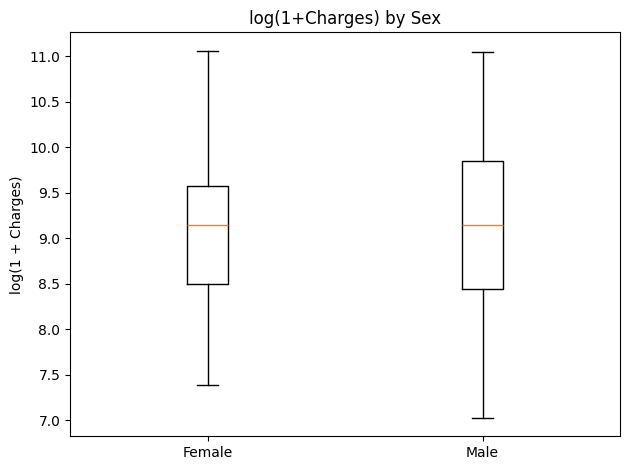

In [37]:
# 1) Create a log-transformed column (handles zero safely)
#    log(1 + x) so there’s no issue if any charge == 0

# (Optional) sanity check for negatives
assert (df['charges'] >= 0).all(), "Found negative charges; log1p is undefined there."

# 2) Ensure categorical for clean grouping
df['sex'] = df['sex'].astype('category')

# 3) Side-by-side boxplot of log-transformed charges by sex
female = df.loc[df['sex'].str.lower() == 'female', 'log_charges'].values
male   = df.loc[df['sex'].str.lower() == 'male',   'log_charges'].values

plt.figure()
plt.boxplot([female, male], labels=['Female', 'Male'], showfliers=True)  # set showfliers=False to hide outliers
plt.ylabel('log(1 + Charges)')
plt.title('log(1+Charges) by Sex')
plt.tight_layout()
plt.show()

In [38]:
df.dtypes

age               int64
sex            category
bmi             float64
children          int64
smoker           object
region         category
charges         float64
log_charges     float64
dtype: object

          count          mean           std        min          25%  \
children                                                              
0         574.0  12365.975602  12023.293942  1121.8739  2734.421150   
1         324.0  12731.171832  11823.631451  1711.0268  4791.643175   
2         240.0  15073.563734  12891.368347  2304.0022  6284.939438   
3         157.0  15355.318367  12330.869484  3443.0640  6652.528800   
4          25.0  13850.656311   9139.223321  4504.6624  7512.267000   
5          18.0   8786.035247   3808.435525  4687.7970  5874.973900   

                  50%           75%          max  
children                                          
0          9856.95190  14440.123825  63770.42801  
1          8483.87015  15632.052050  58571.07448  
2          9264.97915  20379.276748  49577.66240  
3         10600.54830  19199.944000  60021.39897  
4         11033.66170  17128.426080  40182.24600  
5          8589.56505  10019.943975  19023.26000  


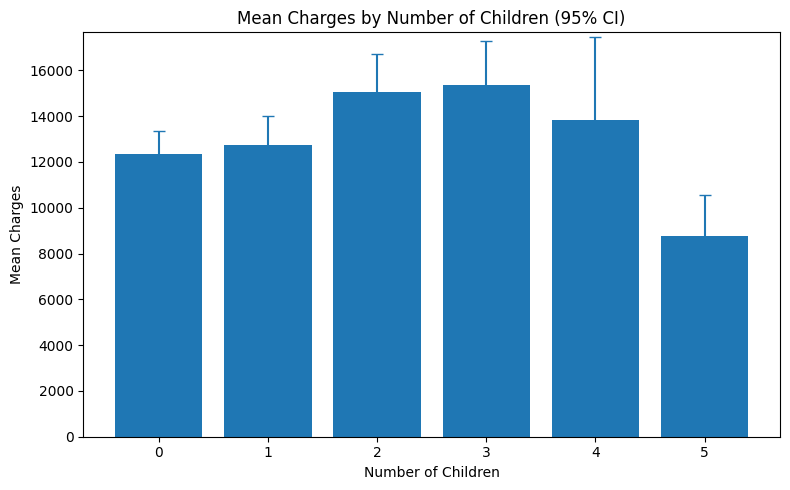

In [39]:
by_kids = df.groupby('children')['charges'].describe()
print(by_kids)

# -------- 2) Mean charges bar chart (+ 95% CI) --------
agg = df.groupby('children')['charges'].agg(['mean', 'count', 'std'])
agg['sem']  = agg['std'] / np.sqrt(agg['count'])
agg['ci95'] = 1.96 * agg['sem']  # ~95% CI

kids = agg.index.to_numpy()
y    = agg['mean'].to_numpy()
yerr = agg['ci95'].to_numpy()

plt.figure(figsize=(8,5))
plt.bar(kids, y)
plt.errorbar(kids, y, yerr=yerr, fmt='none', capsize=4)
plt.xlabel("Number of Children")
plt.ylabel("Mean Charges")
plt.title("Mean Charges by Number of Children (95% CI)")
plt.xticks(kids)
plt.ylim(0, y.max()*1.15)
plt.tight_layout()
plt.show()


In [43]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

df['smoker'] = df['smoker'].astype('category')

USE_LOG_TARGET = True  # model log(1+charges)

RANDOM_STATE = 42
train_df, test_df = train_test_split(df, test_size=0.2, random_state=RANDOM_STATE)

# Features
X_lin_train = train_df[['age', 'bmi']].copy()
X_lin_test  = test_df[['age', 'bmi']].copy()

# Targets (raw and log)
y_train_raw = train_df['charges'].copy()
y_test_raw  = test_df['charges'].copy()

# If modeling logs, transform *targets* with log1p for training
y_train = np.log1p(y_train_raw) if USE_LOG_TARGET else y_train_raw
y_test  = np.log1p(y_test_raw)  if USE_LOG_TARGET else y_test_raw

# Model
lin_pipeline = Pipeline(steps=[
    ("scaler", StandardScaler()),
    ("model", LinearRegression())
])

lin_pipeline.fit(X_lin_train, y_train)
y_pred = lin_pipeline.predict(X_lin_test)

# For evaluation in dollars, invert if we trained on logs
if USE_LOG_TARGET:
    y_true_eval = np.expm1(y_test)   # back to dollars
    y_pred_eval = np.expm1(y_pred)   # back to dollars
else:
    y_true_eval = y_test
    y_pred_eval = y_pred

lin_rmse = mean_squared_error(y_true_eval, y_pred_eval) ** 0.5
lin_r2   = r2_score(y_true_eval, y_pred_eval)

print(f"[Linear] RMSE: {lin_rmse:,.2f} | R²: {lin_r2:.3f}")


[Linear] RMSE: 11,928.35 | R²: 0.083


[XGB] RMSE: 4,581.77 | R²: 0.865


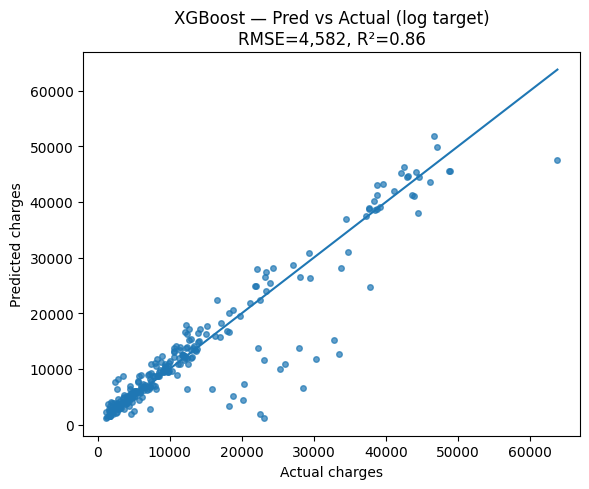

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

USE_LOG_TARGET = True  # set True to model log(1+charges)

features = ['age', 'sex', 'bmi', 'smoker', 'region']
target   = 'charges'

X = df[features].copy()
y = np.log1p(df[target]) if USE_LOG_TARGET else df[target].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

num_cols = ['age', 'bmi']
cat_cols = ['sex', 'smoker', 'region']

pre = ColumnTransformer([
    ("num", "passthrough", num_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_cols),
])

model = XGBRegressor(
    n_estimators=900, learning_rate=0.04, max_depth=4,
    subsample=0.9, colsample_bytree=0.9, random_state=42, n_jobs=-1, tree_method="hist",
    reg_lambda=10.0  
)

pipe = Pipeline([("prep", pre), ("model", model)])
pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
if USE_LOG_TARGET:  # invert for metrics in dollars
    y_true_plot = np.expm1(y_test)
    y_pred_plot = np.expm1(y_pred)
else:
    y_true_plot = y_test
    y_pred_plot = y_pred

rmse = mean_squared_error(y_true_plot, y_pred_plot) ** 0.5
r2   = r2_score(y_true_plot, y_pred_plot)
print(f"[XGB] RMSE: {rmse:,.2f} | R²: {r2:.3f}")

# Matplotlib: Predicted vs Actual
plt.figure(figsize=(6,5))
plt.scatter(y_true_plot, y_pred_plot, s=16, alpha=0.7)
lo, hi = float(min(y_true_plot.min(), y_pred_plot.min())), float(max(y_true_plot.max(), y_pred_plot.max()))
plt.plot([lo, hi], [lo, hi])
plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
ttl = "XGBoost — Pred vs Actual" + (" (log target)" if USE_LOG_TARGET else "")
plt.title(f"{ttl}\nRMSE={rmse:,.0f}, R²={r2:.2f}")
plt.tight_layout()
plt.show()


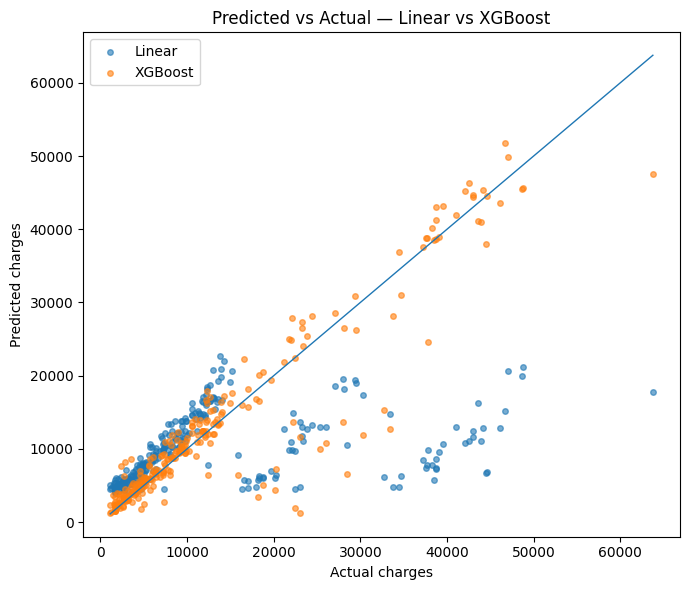

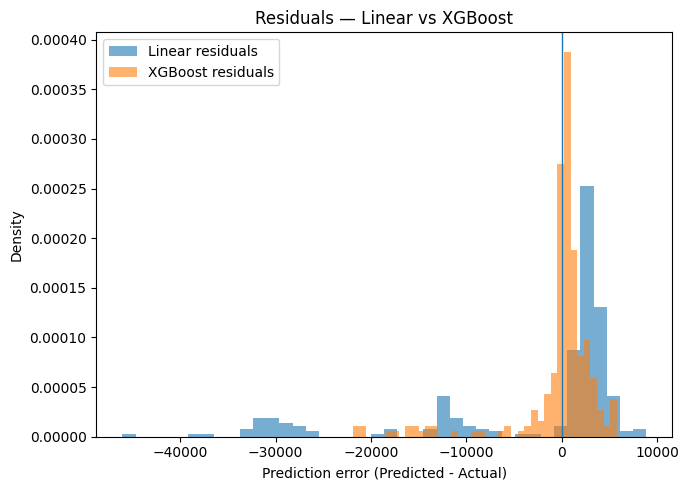

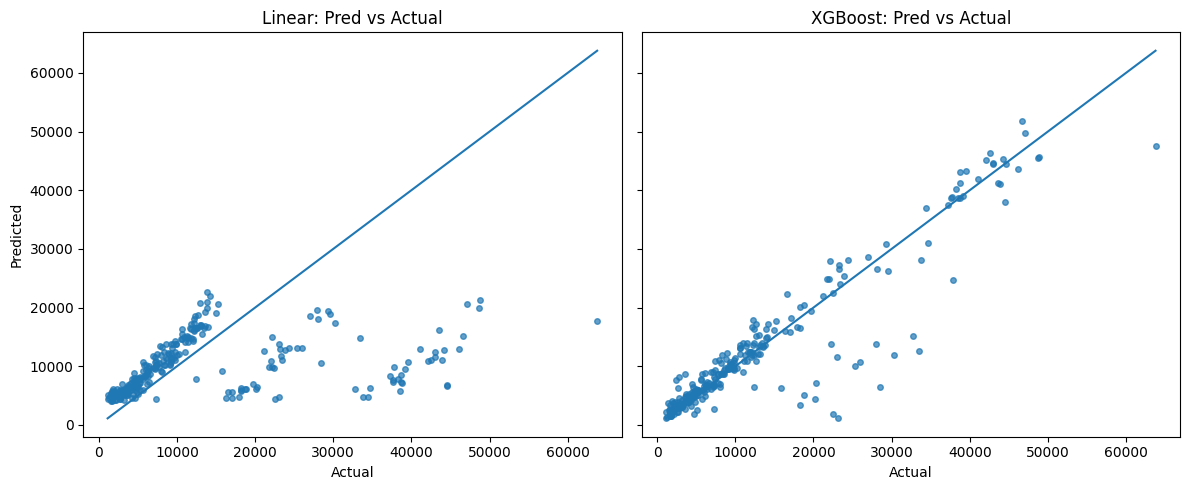

In [44]:
import numpy as np
import matplotlib.pyplot as plt

# -------- 1) Predicted vs Actual (overlay) --------
plt.figure(figsize=(7,6))
plt.scatter(y_true_plot, y_pred_eval, s=16, alpha=0.6, label="Linear")
plt.scatter(y_true_plot, y_pred_plot,    s=16, alpha=0.6, label="XGBoost")

lo = float(min(y_true_plot.min(), y_pred_eval.min(), y_pred_plot.min()))
hi = float(max(y_true_plot.max(), y_pred_eval.max(), y_pred_plot.max()))
plt.plot([lo, hi], [lo, hi], linewidth=1)  # y = x reference

plt.xlabel("Actual charges")
plt.ylabel("Predicted charges")
plt.title("Predicted vs Actual — Linear vs XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

# -------- 2) Residuals comparison (histograms) --------
res_lin = y_pred_eval - y_true_plot
res_xgb = y_pred_plot - y_true_plot

plt.figure(figsize=(7,5))
bins = 40
plt.hist(res_lin, bins=bins, alpha=0.6, density=True, label="Linear residuals")
plt.hist(res_xgb, bins=bins, alpha=0.6, density=True, label="XGBoost residuals")
plt.axvline(0, linewidth=1)  # zero-error line
plt.xlabel("Prediction error (Predicted - Actual)")
plt.ylabel("Density")
plt.title("Residuals — Linear vs XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

# (Optional) If you want a side-by-side panel instead of overlay for Fig 1:
fig, axes = plt.subplots(1, 2, figsize=(12,5), sharey=True)
axes[0].scatter(y_true_plot, y_pred_eval, s=16, alpha=0.7)
lo1 = float(min(y_true_plot.min(), y_pred_eval.min()))
hi1 = float(max(y_true_plot.max(), y_pred_eval.max()))
axes[0].plot([lo1, hi1], [lo1, hi1])
axes[0].set_title("Linear: Pred vs Actual")
axes[0].set_xlabel("Actual"); axes[0].set_ylabel("Predicted")

axes[1].scatter(y_true_plot, y_pred_plot, s=16, alpha=0.7)
lo2 = float(min(y_true_plot.min(), y_pred_plot.min()))
hi2 = float(max(y_true_plot.max(), y_pred_plot.max()))
axes[1].plot([lo2, hi2], [lo2, hi2])
axes[1].set_title("XGBoost: Pred vs Actual")
axes[1].set_xlabel("Actual")

plt.tight_layout(); plt.show()